## Exploratory Analysis of Vancouver Crime Data:

### I will explore the Vancouver crime records from 2003 to 2019.
### I will ask questions and answer them with data outputs and visualizations.
### The dataset is collected from the City of Vancouver's [Open Data Catalogue](https://data.vancouver.ca/datacatalogue/crime-data.htm)
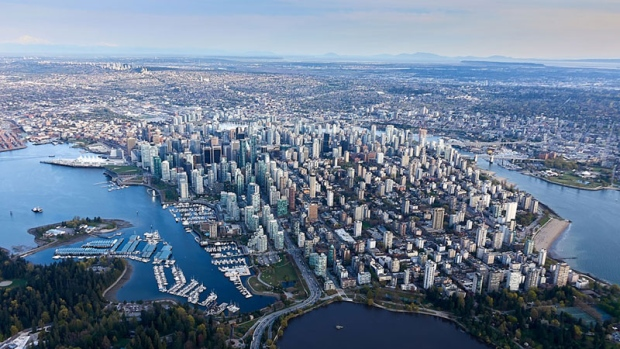

In [1]:
import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)

# Input data files are available in the "../input/" directory.
# For example, running this (by clicking run or pressing Shift+Enter) will list the files in the input directory

import os
print(os.listdir("../input"))

['crime_records.csv']


## 1. Input Dataset First

In [2]:
crime_records = pd.read_csv("../input/crime_records.csv")
crime_records.head()

,TYPE,YEAR,MONTH,DAY,HOUR,MINUTE,HUNDRED_BLOCK,NEIGHBOURHOOD,X,Y
0,Theft from Vehicle,2003,6,28,13.0,30.0,8XX EXPO BLVD,Central Business District,491771.63,5458295.01
1,Theft from Vehicle,2003,11,17,16.0,0.0,56XX OAK ST,South Cambie,490682.32,5453536.96
2,Theft from Vehicle,2003,12,30,14.0,0.0,85XX STANLEY PARK DR,Stanley Park,489104.19,5460347.36
3,Theft of Vehicle,2003,1,15,14.0,45.0,6XX W 41ST AVE,Oakridge,491372.94,5453422.83
4,Theft from Vehicle,2003,12,28,16.0,45.0,85XX STANLEY PARK DR,Stanley Park,489104.19,5460347.36


## 2. Quick dataset summary

### 2.0 Do we have missing data?

In [3]:
# my personal reusable function for detecting missing data
def missing_value_describe(data):
    # check missing values in training data
    missing_value_stats = (data.isnull().sum() / len(data)*100)
    missing_value_col_count = sum(missing_value_stats > 0)
    missing_value_stats = missing_value_stats.sort_values(ascending=False)[:missing_value_col_count]
    print("Number of columns with missing values:", missing_value_col_count)
    if missing_value_col_count != 0:
        # print out column names with missing value percentage
        print("\nMissing percentage (desceding):")
        print(missing_value_stats)
    else:
        print("No misisng data!!!")
missing_value_describe(crime_records)

Number of columns with missing values: 4

Missing percentage (desceding):
NEIGHBOURHOOD    10.427141
MINUTE           10.024884
HOUR             10.024884
HUNDRED_BLOCK     0.002135
dtype: float64


### From the above missing data examination, we can we have 4 columns with missing data: they are NEIGHHOURHOOD (10.42% missing), MINUTE(10.02% missing), HOUR(10.02% missing), and HUNDRED_BLOCK(0.002% missing).

### The missing percentage of MINUTE and HOUR columns are the same. That makes sense because they are recorded together. However, the HUNDRED_BLOCk, which is the physical address, has ~10% lower missing value than the NEIGHBOURHOOD column. What can be the cause? It turnes out they "uses the Statistics Canada definition of neighbourhoods within municipalities. Neighbourhoods within the City of Vancouver are based on the census tract (CT) concept within census metropolitan area (CMA)." The missing NEIGHBOURHOOD columns might be caused by unlabeled neighbourhoods in the Statistics Canada dataset or they just aren't labeled.

### Maybe, we can create a simple model to classify the missing neighbourhood. I will save it for later. Let's explore the dataset first without considering the missing 10% for now.

## 2.1 Dimension of dataset

In [4]:
print("the dimension:", crime_records.shape)

the dimension: (608815, 10)


### We have over 600K rows and 10 columns in our dataset.

## 3. Distribution of each type of crime:

In [5]:
crime_records['TYPE'].value_counts()

Theft from Vehicle                                        203431
Mischief                                                   81963
Break and Enter Residential/Other                          65493
Other Theft                                                62841
Offence Against a Person                                   60784
Theft of Vehicle                                           40981
Break and Enter Commercial                                 38023
Theft of Bicycle                                           29988
Vehicle Collision or Pedestrian Struck (with Injury)       24777
Vehicle Collision or Pedestrian Struck (with Fatality)       285
Homicide                                                     249
Name: TYPE, dtype: int64

Text(0, 0.5, 'count')

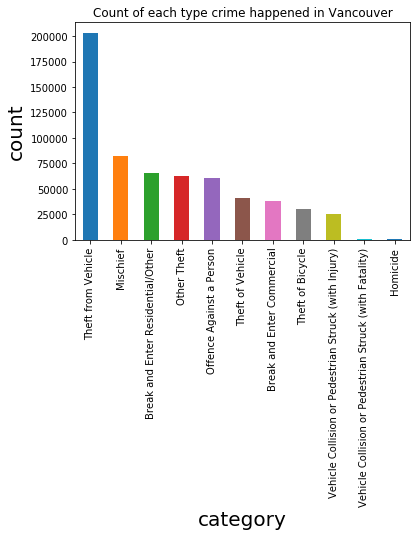

In [18]:
# crime type distribution
nameplot = crime_records['TYPE'].value_counts().plot.bar(title='Count of each type crime happened in Vancouver')
nameplot.set_xlabel('category',size=20)
nameplot.set_ylabel('count',size=20)

### It appears that the most common type of is associated with vehicle in Vancouver: Theft from Vehicle, Theft of Vehicle, Theft of Bicycle and Vehicle Collision. Since 2003, there are 203431 crime categorized as "Theft from Vehicle"; people do need to add some sort of car alarm system in their car in Vancouver.

## 3.1 Has the "Theft from Vehicle" crime decreased over time?

In [7]:
# gather yearly count of "Theft from Vehicle" crime in Vancouver
theft_from_vehicle = crime_records[crime_records["TYPE"]=="Theft from Vehicle"]
theft_from_vehicle_yearly_counts = theft_from_vehicle["YEAR"].value_counts(sort=False)
theft_from_vehicle_year_index = theft_from_vehicle_yearly_counts.index.tolist()

In [8]:
theft_from_vehicle_yearly_counts

2003    17744
2004    18204
2005    16554
2006    14734
2007    12226
2008    11298
2009    10007
2010     8612
2011     7435
2012     8097
2013     8341
2014    10139
2015    10546
2016    12815
2017    12959
2018    14999
2019     8721
Name: YEAR, dtype: int64

In [9]:
import matplotlib.pyplot as plt # graphing purpose

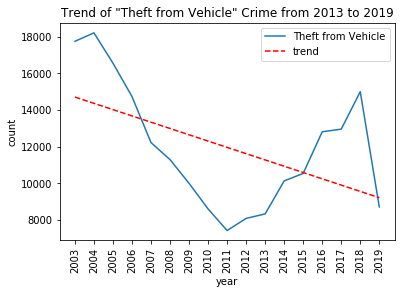

In [10]:
# plot the "Theft from Vehicle" trend from 2013 to 2019 
# plotting the line 2 points  
plt.plot(theft_from_vehicle_year_index, theft_from_vehicle_yearly_counts, label = "Theft from Vehicle") 
  
import matplotlib.pylab as pylab

# calc the trendline
z = np.polyfit(theft_from_vehicle_year_index, theft_from_vehicle_yearly_counts, 1)
p = np.poly1d(z)
pylab.plot(theft_from_vehicle_year_index,p(theft_from_vehicle_year_index),"r--", label="trend")

# configuration
plt.xlabel('year')
plt.ylabel('count')
plt.title('Trend of "Theft from Vehicle" Crime from 2003 to 2019') 
plt.legend()
plt.xticks(theft_from_vehicle_year_index, rotation='vertical')
plt.show() 

### From the above trendline, we can see the number of crime categorized as "Theft from Vehicle" indeed dropped twice from 2004 to 2011 and from 2018 to 2019. There is least number of "Theft from Vehicle" in 2011. 

## 4. Distribution of crime based on time data:

## 4.1 When is the popular recorded month, day, and hour of "Theft from Vehicle" crime in a day?

### "Theft from Vehicle" crime counted by month:

Text(0, 0.5, 'count')

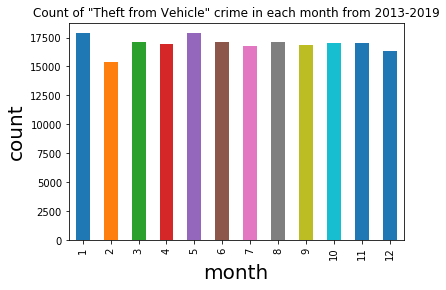

In [19]:
# gather monthly count of "Theft from Vehicle" crime in Vancouver
nameplot = theft_from_vehicle["MONTH"].value_counts(sort=False).plot.bar(
    title='Count of "Theft from Vehicle" crime in each month from 2003-2019')
nameplot.set_xlabel('month',size=20)
nameplot.set_ylabel('count',size=20)

### The value doesn't fluctuate that much. January has the highest number of "Theft from Vehicle" crime in Vancouver. It turns out each month has quite similar number of "Theft from Vehicle" crime happening in Vancouver from 2003 to 2019. 

### "Theft from Vehicle" crime counted by day:

Text(0, 0.5, 'count')

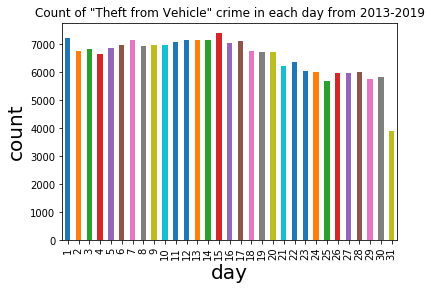

In [28]:
# gather monthly count of "Theft from Vehicle" crime in Vancouver
nameplot = theft_from_vehicle["DAY"].value_counts(sort=False).plot.bar(
    title='Count of "Theft from Vehicle" crime in each day from 2003-2019')
nameplot.set_xlabel('day',size=20)
nameplot.set_ylabel('count',size=20)

### The bar chart shows similar observations comparing to the count by month except there exists a trend of decreasing number of recorded crime from the 1st day of a month to the end of a month. 

### "Theft from Vehicle" crime counted by hour:

Text(0, 0.5, 'count')

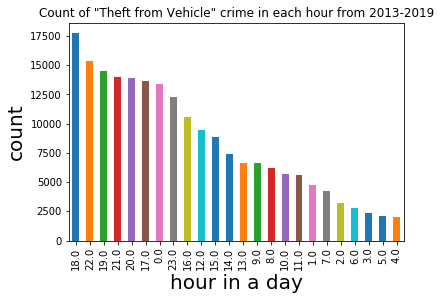

In [26]:
# gather monthly count of "Theft from Vehicle" crime in Vancouver
nameplot = theft_from_vehicle["HOUR"].value_counts().plot.bar(
    title='Count of "Theft from Vehicle" crime in each hour from 2003-2019')
nameplot.set_xlabel('hour in a day',size=20)
nameplot.set_ylabel('count',size=20)

### From the above chart, we can observe that it became unsafe to park your car in Vancouver in the afternoon or at night. The top 10 counted hour of "Theft from Vehicle" crime happened after 12 PM.

## 5. Crime investigation based on location columns

### We have 4 columns describe the locations of the given crime records. They are: HUNDRED_BLOCK, NEIGHBOURHOOD, X, and Y. Let's explore these columns now. 

### 5.1 How many unique blocks do we have?

In [32]:
len(crime_records["HUNDRED_BLOCK"].unique())

21955

### That's a lot of blocks! Let's find out:
### 5.2 What are the top 10 crime populated block based on crime data?

Text(26.200000000000003, 0.5, 'count')

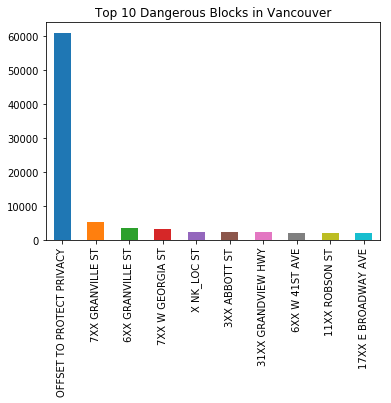

In [34]:
crime_records["HUNDRED_BLOCK"].value_counts()[:10].plot.bar(
    title='Top 10 Dangerous Blocks in Vancouver')
nameplot.set_xlabel('block name',size=20)
nameplot.set_ylabel('count',size=20)

### To protect privacy, police labeled about 10% of the data to be "OFFSET TO PROTECT PRIVACY". Let's graph the top 10 crime-populated block without the "OFFSET TO PROTECT PRIVACY" rows. 

Text(26.200000000000003, 0.5, 'count')

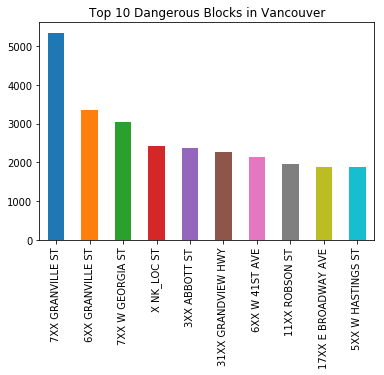

In [35]:
crime_records["HUNDRED_BLOCK"].value_counts()[1:11].plot.bar(
    title='Top 10 Dangerous Blocks in Vancouver')
nameplot.set_xlabel('block name',size=20)
nameplot.set_ylabel('count',size=20)

### Granville street seems to be very dangerous from the above visualization.

### Well, 60K of 609K rows of data are offsetted to protect privacy. We won't be able to use those data because the HUNDRED_BLOCK, NEIGHBOURHOOD data, X, and Y data will be inaccurate to describe the crime happened in Vancouver from 2003 to 2019. Let's create a new dataframe with usable data that's not labeled as "OFFSET TO PROTECT PRIVACY".

In [ ]:
crime_records_without_offset_data = crime_records[crime_records["HUNDRED_BLOCK"] != "OFFSET TO PROTECT PRIVACY"]

### Convert UTM to Longtitude and Latitude system.
### See my Github repository: https://github.com/KangboLu/UTM-to-Longtitude-Latitude-System

In [11]:
import math

def utmToLatLong(utmNorthing, utmEasting, utmZone):
    eastingOffset = 500000.0
    northingOffset = 10000000.0
    k0 = 0.9996
    equatorialRadius = 6378137.0
    eccSquared = 0.006694380023
    eccPrimeSquared = eccSquared / (1 - eccSquared)
    e1 = (1 - math.sqrt(1 - eccSquared)) / (1 + math.sqrt(1 - eccSquared));
    rad2deg = 180.0/math.pi

    # Casts input from string to floats or ints
    # Removes 500,000 metre offset for longitude
    xUTM = float(utmEasting) - eastingOffset
    yUTM = float(utmNorthing)
    zoneNumber = int(utmZone)

    # Finds the origin longitude for the zone
    lonOrigin = (zoneNumber - 1) * 6 - 180 + 3 # +3 puts in zone centre

    M = yUTM / k0 #This finds the meridional arc
    mu = M / (equatorialRadius * (1- eccSquared / 4 - 3 * eccSquared * eccSquared / 64 -5 * eccSquared * eccSquared * eccSquared /256))

    # Calculates the footprint latitude
    phi1Rad = mu + (3 * e1 / 2 - 27 * e1 * e1 * e1 /32) * math.sin(2*mu) + ( 21 * e1 * e1 / 16 - 55 * e1 * e1 * e1 * e1 / 32) * math.sin( 4 * mu) + (151 * e1 * e1 * e1 / 96) * math.sin(6 * mu)
    phi1 = phi1Rad * rad2deg

    # Variables for conversion equations
    N1 = equatorialRadius / math.sqrt( 1 - eccSquared * math.sin(phi1Rad) *  math.sin(phi1Rad))
    T1 = math.tan(phi1Rad) * math.tan(phi1Rad)
    C1 = eccPrimeSquared * math.cos(phi1Rad) * math.cos(phi1Rad)
    R1 = equatorialRadius * (1 - eccSquared) / math.pow(1 - eccSquared * math.sin(phi1Rad) * math.sin(phi1Rad), 1.5)
    D = xUTM / (N1 * k0)

    # Calculate latitude, in decimal degrees
    lat = phi1Rad - ( N1 * math.tan(phi1Rad) / R1) * (D * D / 2 - (5 + 3 * T1 + 10 * C1 - 4 * C1 * C1 - 9 * eccPrimeSquared) * D * D * D * D / 24 + (61 + 90 * T1 + 298 * C1 + 45 * T1 * T1 - 252 * eccPrimeSquared - 3 * C1 * C1) * D * D * D * D * D * D / 720)
    lat = lat * rad2deg
    
    # Calculate longitude, in decimal degrees
    lon = (D - (1 + 2 * T1 + C1) * D * D * D / 6 + (5 - 2 * C1 + 28 * T1 - 3 * C1 * C1 + 8 * eccPrimeSquared + 24 * T1 * T1) * D * D * D * D * D / 120) / math.cos(phi1Rad)
    lon = lonOrigin + lon * rad2deg
    
    return lon, lat

In [12]:
utmToLatLong(7042000,510000,32)

(9.200909996820407, 63.50614385877153)